В данной работе используются данные Grammatical Facial Expressions (https://archive.ics.uci.edu/ml/datasets/Grammatical+Facial+Expressions)

Данные получены из обработки 18 видео, записанных с помощью Microsoft Kinect. В каждом видео пользователь говорит 5 предложений, используя мимику. Результат обработки - кадр видео и текстовый файл состоящий из 100 координат(x,y,z) положений носа, глаз, бровей, контура лица и радужки глаз. В каждой строке содержится один кадр видео. Изображения классфицировались вручную специалистом.

Набор данных состоит из 36 файлов: 18 файлов с точками и 18 с классификацией. Название файла отражает мимику лица. Буква 'a' или 'b' обозначает пользователя на видео. 

Координаты x и  y даны в пикселях, z в миллиметрах. 

Заголовок кадра:
* 0 - 7	(x,y,z) - левый глаз 
* 8 - 15 (x,y,z) - правый глаз 
* 16 - 25	(x,y,z) - левая бровь 
* 26 - 35	(x,y,z) - правая бровь 
* 36 - 47	(x,y,z) - нос
* 48 - 67	(x,y,z) - рот 
* 68 - 86	(x,y,z) - контур лица
* 87	(x,y,z) - левая радужка глаза 
* 88 (x,y,z) - правая радужка глаза
* 89	(x,y,z) - кончик носа 
* 90 - 94	(x,y,z) - линия над левой бровью 
* 95 - 99	(x,y,z) - линия над правой бровью

Я выбрал первые два файла a_affirmative_datapoints.txt и a_affirmative_targets.txt.

![](view_points.png)


Первым делом загружаем исходные данные. Так как они были запакованы в zip архив  на сайте, то пришлось скачать их и подгрузить из папки. Для этого использовалась функция pandas.read_csv. header=0 - первая строка используется как заголовок, na_values='0', все нулевые значения заменяются на NA для последующего поиска и обработки, delim_whitespace=True - для разделения столбцов используются пробелы.

In [82]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

X_data = pd.read_csv('a_affirmative_datapoints.txt', header=0, na_values='0', delim_whitespace=True)
y_data = pd.read_csv('a_affirmative_targets.txt', header=None, delim_whitespace=True)
print(X_data.shape)
print(y_data.shape)

(1062, 301)
(1062, 1)


Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния. Но в связи с тем, что в данной задаче большое количество признаков (301 столбец с координатами), были выделены только некоторые.  

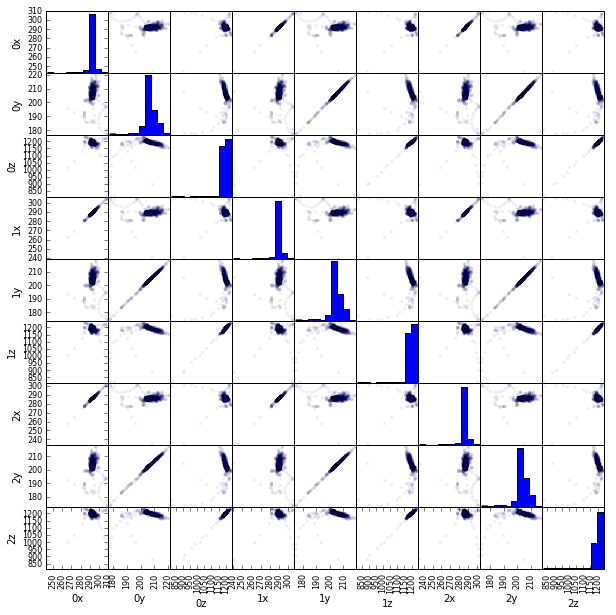

In [83]:
from pandas.tools.plotting import scatter_matrix
temp = X_data.iloc[:,list(range(1,10))]
scatter_matrix(temp, alpha=0.05, figsize=(10, 10));

Используя метод count, в последних столбцах можно заметить пропуски по данным. Можно удалить строки/столбцы с пропущенными данными, а можно заполнить средними значениями. Для этого воспользуемся методом fillna.

In [84]:
X_data.count(axis=0)
X_data = X_data.fillna(X_data.median(axis=0),axis=0)
X_data.count(axis=0)

0.0    1062
0x     1062
0y     1062
0z     1062
1x     1062
1y     1062
1z     1062
2x     1062
2y     1062
2z     1062
3x     1062
3y     1062
3z     1062
4x     1062
4y     1062
4z     1062
5x     1062
5y     1062
5z     1062
6x     1062
6y     1062
6z     1062
7x     1062
7y     1062
7z     1062
8x     1062
8y     1062
8z     1062
9x     1062
9y     1062
       ... 
90x    1062
90y    1062
90z    1062
91x    1062
91y    1062
91z    1062
92x    1062
92y    1062
92z    1062
93x    1062
93y    1062
93z    1062
94x    1062
94y    1062
94z    1062
95x    1062
95y    1062
95z    1062
96x    1062
96y    1062
96z    1062
97x    1062
97y    1062
97z    1062
98x    1062
98y    1062
98z    1062
99x    1062
99y    1062
99z    1062
dtype: int64

В связи с чувствительностью некоторых алгоритмов машинного обучения к масштабированию данных нормализуем X_data. Для этого каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению.

In [85]:
# X_data = (X_data - X_data.mean())/X_data.std()
# X_data.describe()

,0.0,0x,0y,0z,1x,1y,1z,2x,2y,2z,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
count,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,...,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03
mean,5.703884e-07,1.556905e-14,-4.236494e-14,-1.645890e-15,8.015350e-15,5.446156e-15,3.157968e-15,-2.384533e-14,3.900625e-14,-3.211493e-16,...,-3.606239e-15,-1.534826e-14,-2.345728e-14,3.104443e-15,1.816835e-13,-1.644552e-14,-2.274807e-16,1.037647e-13,1.853299e-15,-5.432775e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.725462e+00,-1.467644e+01,-5.623410e+00,-1.481286e+01,-1.488220e+01,-5.811406e+00,-1.425566e+01,-1.534445e+01,-5.944049e+00,-1.459170e+01,...,-1.464204e+01,-1.034690e+01,-5.767225e+00,-1.466171e+01,-9.650779e+00,-5.989331e+00,-1.049678e+01,-9.295350e+00,-6.075594e+00,-1.267808e+01
25%,-8.705418e-01,-4.363276e-01,-4.308245e-01,-2.970543e-01,-4.283102e-01,-4.272654e-01,-2.747186e-01,-3.942959e-01,-4.224935e-01,-2.086919e-01,...,-2.331080e-01,-5.234376e-01,-3.854571e-01,-3.400211e-01,-5.404408e-01,-3.628562e-01,-6.442944e-01,-5.743601e-01,-3.904320e-01,-3.486254e-01
50%,-1.093269e-03,-1.694529e-02,-9.434753e-02,2.171297e-01,-1.089624e-02,-9.208663e-02,2.259764e-01,1.989935e-04,-6.500778e-02,1.421131e-01,...,1.281187e-01,-1.202932e-02,-1.430617e-01,1.904118e-01,-3.031113e-03,-1.515035e-01,7.708339e-03,-4.594619e-03,-1.285368e-01,-1.448328e-01
75%,8.638513e-01,3.285768e-01,6.257507e-01,3.753401e-01,3.205126e-01,6.109603e-01,3.800364e-01,3.134654e-01,6.079854e-01,2.980265e-01,...,4.893454e-01,4.126198e-01,4.936580e-01,3.944245e-01,4.152330e-01,4.476337e-01,6.597110e-01,4.162358e-01,4.447578e-01,-1.448328e-01
max,1.761716e+00,4.900341e+00,2.787329e+00,1.720129e+00,4.654355e+00,2.792226e+00,1.689546e+00,4.668059e+00,2.775702e+00,1.467377e+00,...,1.372344e+00,7.245117e+00,3.096564e+00,1.700105e+00,7.554783e+00,2.976668e+00,3.847280e+00,7.926616e+00,2.901323e+00,5.510412e+00


Вот теперь только можно делить данные на обучающую и тестовую выборки. Для этого воспользуемся функцией train_test_split. Деление производилось в пропорции 50%:50%, 70%:30%, 30%:70%.

In [86]:
# print(X_data.shape)
# print(y_data.shape)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)
print(X_train.shape)
# print(y_test.shape)

796 266
(796, 301)


Выбираем метод ближайших соседей и первым делом обучаем нашу модель на данных X_train и y_train. В качестве небольшого теста, что все работате правильно и данные подготовлены нормально, количество соседей поставлено в 1. 

После того, как модель обучена, мы можем предсказывать значение целевого признака по входным признакам для новых объектов. Делаем это с помощью метода predict. После этого смотрим разницу между предсказанными и исходными значениями. 

In [87]:
from sklearn import neighbors
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

model = neighbors.KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)
print (err_train, err_test)

0.0 0.0827067669173


Построим график ошибки на тестовой и тренировочной выборках от количества соседей. 

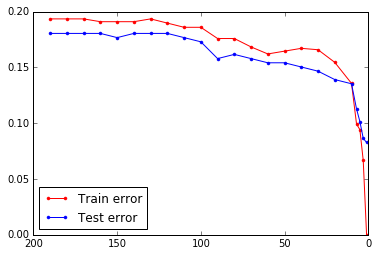

In [92]:
neighborSize = 200
k_array =  [1, 3, 5, 7] + list(range(10, neighborSize, 10))
err_train_array = []
err_test_array = []
for k in k_array:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    err_train = np.mean(y_train != y_train_pred)
    err_test = np.mean(y_test != y_test_pred)
    err_train_array.append(err_train)
    err_test_array.append(err_test)

plt.plot(k_array, err_train_array, '.-r', label = 'Train error')
plt.plot(k_array, err_test_array,  '.-b', label = 'Test error')    
plt.legend(loc = 'best')
plt.xlim([neighborSize, 0])
plt.show()

График получается достаточно странным. Странность заключается в том, что уже при n_neighbors = 1 получается минимальная тестовая ошибка. Хотя (ссылаясь на лекции) в методе ближайших соседей при малых значениях n_neighbors возникало переобучение, алгоритм отлично угадывал значения из тестовой выборки, но плохо на тренировочной. 